<a href="https://colab.research.google.com/github/cocoalice03/FOAD_equation_diff./blob/main/FOAD_equation_diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-23-54afad759b61>:33: RuntimeWarning: overflow encountered in scalar multiply
  x[t] = x[t-1] + dt * (alpha * x[t-1] - beta * x[t-1] * y[t-1])
<ipython-input-23-54afad759b61>:34: RuntimeWarning: overflow encountered in scalar multiply
  y[t] = y[t-1] + dt * (delta * x[t-1] * y[t-1] - gamma * y[t-1])
<ipython-input-23-54afad759b61>:34: RuntimeWarning: invalid value encountered in scalar subtract
  y[t] = y[t-1] + dt * (delta * x[t-1] * y[t-1] - gamma * y[t-1])
<ipython-input-23-54afad759b61>:33: RuntimeWarning: overflow encountered in scalar multiply
  x[t] = x[t-1] + dt * (alpha * x[t-1] - beta * x[t-1] * y[t-1])
<ipython-input-23-54afad759b61>:34: RuntimeWarning: overflow encountered in scalar multiply
  y[t] = y[t-1] + dt * (delta * x[t-1] * y[t-1] - gamma * y[t-1])
<ipython-input-23-54afad759b61>:34: RuntimeWarning: invalid value encountered in scalar subtract
  y[t] = y[t-1] + dt * (delta * x[t-1] * y[t-1] - gamma * y[t-1])
<ipython-input-23-54afad759b61>:33: RuntimeW

✅ Meilleurs paramètres trouvés :
alpha = 0.6666666666666666
beta  = 0.3333333333333333
gamma = 0.6666666666666666
delta = 0.6666666666666666
Erreur quadratique totale (MSE) = 208.20


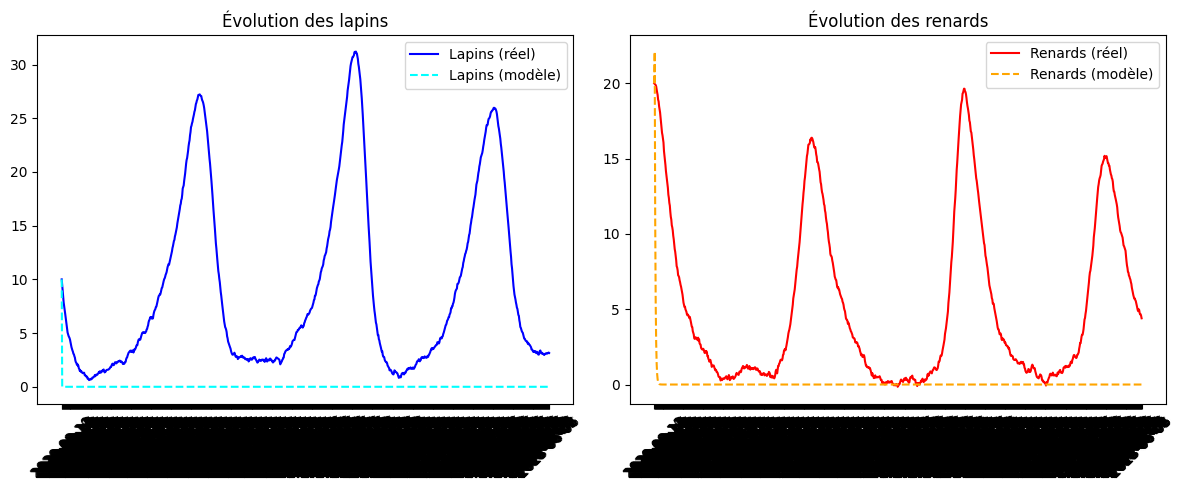

In [ ]:
import pandas as pd
import numpy as np
from itertools import product
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ------------------------
# PARTIE 1 : Données + Euler
# ------------------------

# Charger les données
df = pd.read_csv("populations_lapins_renards.csv")
lapins_reel = df["lapin"].values
renards_reel = df["renard"].values
t_steps = len(df)

# Paramètres Euler
dt = 0.1
steps = int(t_steps / dt)

# Mise à l’échelle pour stabilité numérique
x0 = lapins_reel[0] / 100
y0 = renards_reel[0] / 100
lapins_scaled = lapins_reel / 100
renards_scaled = renards_reel / 100

# Fonction de simulation
def lotka_volterra_euler(alpha, beta, gamma, delta, x0, y0, steps):
    x = np.zeros(steps)
    y = np.zeros(steps)
    x[0], y[0] = x0, y0
    for t in range(1, steps):
        x[t] = x[t-1] + dt * (alpha * x[t-1] - beta * x[t-1] * y[t-1])
        y[t] = y[t-1] + dt * (delta * x[t-1] * y[t-1] - gamma * y[t-1])
    return x, y

# ------------------------
# PARTIE 2 : Optimisation des paramètres
# ------------------------

# Grille de paramètres
valeurs = [1/3, 2/3, 1, 4/3]
params_grid = list(product(valeurs, repeat=4))

# Recherche des meilleurs paramètres
meilleure_mse = float('inf')
meilleurs_params = None
meilleure_pred = None

for alpha, beta, gamma, delta in params_grid:
    x_pred, y_pred = lotka_volterra_euler(alpha, beta, gamma, delta, x0, y0, steps)
    x_pred = x_pred[::int(1/dt)]
    y_pred = y_pred[::int(1/dt)]

    if len(x_pred) != t_steps or np.any(np.isnan(x_pred)) or np.any(np.isinf(x_pred)):
        continue

    mse = mean_squared_error(lapins_scaled, x_pred) + mean_squared_error(renards_scaled, y_pred)
    if mse < meilleure_mse:
        meilleure_mse = mse
        meilleurs_params = (alpha, beta, gamma, delta)
        meilleure_pred = (x_pred, y_pred)

# ------------------------
# Affichage des résultats
# ------------------------

print("✅ Meilleurs paramètres trouvés :")
print(f"alpha = {meilleurs_params[0]}")
print(f"beta  = {meilleurs_params[1]}")
print(f"gamma = {meilleurs_params[2]}")
print(f"delta = {meilleurs_params[3]}")
print(f"Erreur quadratique totale (MSE) = {meilleure_mse:.2f}")

# Affichage graphique
jours = df["date"]
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(jours, lapins_scaled, label="Lapins (réel)", color='blue')
plt.plot(jours, meilleure_pred[0], label="Lapins (modèle)", linestyle='--', color='cyan')
plt.xticks(rotation=45)
plt.legend()
plt.title("Évolution des lapins")

plt.subplot(1, 2, 2)
plt.plot(jours, renards_scaled, label="Renards (réel)", color='red')
plt.plot(jours, meilleure_pred[1], label="Renards (modèle)", linestyle='--', color='orange')
plt.xticks(rotation=45)
plt.legend()
plt.title("Évolution des renards")

plt.tight_layout()
plt.show()
